In [1]:
import os
import sys

import LogSig
import IPLoM
import SLCT
import LKE

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
sys.path.append('../')

In [3]:
# LogSig demo
import sys
sys.path.append('../')
import LogSig, evaluator
import os
import pandas as pd

input_dir = 'logs/' # The input directory of log file
output_dir = 'LogSig_result/' # The output directory of parsing results

benchmark_settings = {
    'HDFS': {
        'log_file': 'HDFS/HDFS_2k.log',
        'log_format': '<Date> <Time> <Pid> <Level> <Component>: <Content>',
        'regex': [r'blk_-?\d+', r'(\d+\.){3}\d+(:\d+)?'],
        'groupNum': 15
        },

    'Zookeeper': {
        'log_file': 'Zookeeper/Zookeeper_2k.log',
        'log_format': '<Date> <Time> - <Level>  \[<Node>:<Component>@<Id>\] - <Content>',
        'regex': [r'(/|)(\d+\.){3}\d+(:\d+)?'],
        'groupNum': 46
        },

    'BGL': {
        'log_file': 'BGL/BGL_2k.log',
        'log_format': '<Label> <Timestamp> <Date> <Node> <Time> <NodeRepeat> <Type> <Component> <Level> <Content>',
        'regex': [r'core\.\d+'],
        'groupNum': 500
        },

    'HPC': {
        'log_file': 'HPC/HPC_2k.log',
        'log_format': '<LogId> <Node> <Component> <State> <Time> <Flag> <Content>',
        'regex': [r'=\d+'],
        'groupNum': 800
        },

    'Proxifier': {
        'log_file': 'Proxifier/Proxifier_2k.log',
        'log_format': '\[<Time>\] <Program> - <Content>',
        'regex': [r'<\d+\ssec', r'([\w-]+\.)+[\w-]+(:\d+)?', r'\d{2}:\d{2}(:\d{2})*', r'[KGTM]B'],
        'groupNum': 10
        },

}

bechmark_result = []
for dataset, setting in benchmark_settings.iteritems():
    print('\n=== Evaluation on %s ==='%dataset)
    indir = os.path.join(input_dir, os.path.dirname(setting['log_file']))
    log_file = os.path.basename(setting['log_file'])

    parser = LogSig.LogParser(log_format=setting['log_format'], indir=indir, outdir=output_dir, rex=setting['regex'], groupNum=setting['groupNum'])
    parser.parse(log_file)
    
    F1_measure, accuracy = evaluator.evaluate(
                           groundtruth=os.path.join(indir, log_file + '_structured.csv'),
                           parsedresult=os.path.join(output_dir, log_file + '_structured.csv')
                           )
    bechmark_result.append([dataset, F1_measure, accuracy])

print('\n=== Overall evaluation results ===')
df_result = pd.DataFrame(bechmark_result, columns=['Dataset', 'F1_measure', 'Accuracy'])
df_result.set_index('Dataset', inplace=True)
print(df_result)
df_result.T.to_csv('LogSig_bechmark_result.csv')



=== Evaluation on HPC ===
Parsing file: logs/HPC/HPC_2k.log
Loading logs...
Generating term pairs...
Log message partitioning...
Log message signature construction...
Parsing done. [Time taken: 0:01:14.325158]
Precision: 0.7579, Recall: 0.7247, F1_measure: 0.7409, Parsing_Accuracy: 0.3540

=== Evaluation on HDFS ===
Parsing file: logs/HDFS/HDFS_2k.log
Loading logs...
Generating term pairs...
Log message partitioning...
Log message signature construction...
Parsing done. [Time taken: 0:00:04.369862]
Precision: 1.0000, Recall: 0.9837, F1_measure: 0.9918, Parsing_Accuracy: 0.8495

=== Evaluation on Zookeeper ===
Parsing file: logs/Zookeeper/Zookeeper_2k.log
Loading logs...
Generating term pairs...
Log message partitioning...
Log message signature construction...
Parsing done. [Time taken: 0:00:11.534323]
Precision: 0.9971, Recall: 0.9960, F1_measure: 0.9966, Parsing_Accuracy: 0.7380

=== Evaluation on BGL ===
Parsing file: logs/BGL/BGL_2k.log
Loading logs...
Generating term pairs...
Log 

In [4]:
# IPLom demo
import sys
sys.path.append('../')
import IPLoM, evaluator
import os
import pandas as pd


input_dir = 'logs/'  # The input directory of log file
output_dir = 'IPLoM_result/'  # The output directory of parsing results

benchmark_settings = {
    'HDFS': {
        'log_file': 'HDFS/HDFS_2k.log',
        'log_format': '<Date> <Time> <Pid> <Level> <Component>: <Content>',
        'CT': 0.35,
        'lowerBound': 0.25,
        'regex': [r'blk_-?\d+', r'(\d+\.){3}\d+(:\d+)?']
        },

    'Zookeeper': {
        'log_file': 'Zookeeper/Zookeeper_2k.log',
        'log_format': '<Date> <Time> - <Level>  \[<Node>:<Component>@<Id>\] - <Content>',
        'CT': 0.4,
        'lowerBound': 0.7,
        'regex': [r'(/|)(\d+\.){3}\d+(:\d+)?']
        },

    'BGL': {
        'log_file': 'BGL/BGL_2k.log',
        'log_format': '<Label> <Timestamp> <Date> <Node> <Time> <NodeRepeat> <Type> <Component> <Level> <Content>',
        'CT': 0.4,
        'lowerBound': 0.01,
        'regex': [r'core\.\d+']
        },

    'HPC': {
        'log_file': 'HPC/HPC_2k.log',
        'log_format': '<LogId> <Node> <Component> <State> <Time> <Flag> <Content>',
        'CT': 0.58,
        'lowerBound': 0.25,
        'regex': [r'=\d+']
        },

    'Proxifier': {
        'log_file': 'Proxifier/Proxifier_2k.log',
        'log_format': '\[<Time>\] <Program> - <Content>',
        'CT': 0.9,
        'lowerBound': 0.25,
        'regex': [r'<\d+\ssec', r'([\w-]+\.)+[\w-]+(:\d+)?', r'\d{2}:\d{2}(:\d{2})*', r'[KGTM]B'],
        },

}

bechmark_result = []
for dataset, setting in benchmark_settings.iteritems():
    print('\n=== Evaluation on %s ==='%dataset)
    indir = os.path.join(input_dir, os.path.dirname(setting['log_file']))
    log_file = os.path.basename(setting['log_file'])

    parser = IPLoM.LogParser(log_format=setting['log_format'], indir=indir, outdir=output_dir,
                             CT=setting['CT'], lowerBound=setting['lowerBound'], rex=setting['regex'])
    parser.parse(log_file)
    
    F1_measure, accuracy = evaluator.evaluate(
                           groundtruth=os.path.join(indir, log_file + '_structured.csv'),
                           parsedresult=os.path.join(output_dir, log_file + '_structured.csv')
                           )
    bechmark_result.append([dataset, F1_measure, accuracy])


print('\n=== Overall evaluation results ===')
df_result = pd.DataFrame(bechmark_result, columns=['Dataset', 'F1_measure', 'Accuracy'])
df_result.set_index('Dataset', inplace=True)
print(df_result)
df_result.T.to_csv('IPLoM_bechmark_result.csv')



=== Evaluation on HPC ===
Parsing file: logs/HPC/HPC_2k.log
Parsing done. [Time taken: 0:00:00.663235]
Precision: 0.9577, Recall: 0.9999, F1_measure: 0.9784, Parsing_Accuracy: 0.8235

=== Evaluation on HDFS ===
Parsing file: logs/HDFS/HDFS_2k.log
Parsing done. [Time taken: 0:00:00.859690]
Precision: 1.0000, Recall: 1.0000, F1_measure: 1.0000, Parsing_Accuracy: 1.0000

=== Evaluation on Zookeeper ===
Parsing file: logs/Zookeeper/Zookeeper_2k.log
Parsing done. [Time taken: 0:00:00.763250]
Precision: 0.9991, Recall: 0.9998, F1_measure: 0.9995, Parsing_Accuracy: 0.9615

=== Evaluation on BGL ===
Parsing file: logs/BGL/BGL_2k.log
Parsing done. [Time taken: 0:00:00.588315]
Precision: 0.9982, Recall: 1.0000, F1_measure: 0.9991, Parsing_Accuracy: 0.9390

=== Evaluation on Proxifier ===
Parsing file: logs/Proxifier/Proxifier_2k.log
Parsing done. [Time taken: 0:00:00.636653]
Precision: 0.9999, Recall: 0.6480, F1_measure: 0.7864, Parsing_Accuracy: 0.5150

=== Overall evaluation results ===
     

In [5]:
# SLCT demo
import sys
sys.path.append('../')
import SLCT, evaluator
import os
import pandas as pd


input_dir = 'logs/' # The input directory of log file
output_dir = 'SLCT_result/' # The output directory of parsing results

benchmark_settings = {
    'HDFS': {
        'log_file': 'HDFS/HDFS_2k.log',
        'log_format': '<Date> <Time> <Pid> <Level> <Component>: <Content>',
        'regex': [r'blk_-?\d+', r'(\d+\.){3}\d+(:\d+)?'],
        'support': 120
        },

    'Zookeeper': {
        'log_file': 'Zookeeper/Zookeeper_2k.log',
        'log_format': '<Date> <Time> - <Level>  \[<Node>:<Component>@<Id>\] - <Content>',
        'regex': [r'(/|)(\d+\.){3}\d+(:\d+)?'],
        'support': 10
        },

    'BGL': {
        'log_file': 'BGL/BGL_2k.log',
        'log_format': '<Label> <Timestamp> <Date> <Node> <Time> <NodeRepeat> <Type> <Component> <Level> <Content>',
        'regex': [r'core\.\d+'],
        'support': 6
        },

    'HPC': {
        'log_file': 'HPC/HPC_2k.log',
        'log_format': '<LogId> <Node> <Component> <State> <Time> <Flag> <Content>',
        'regex': [r'=\d+'],
        'support': 7
        },

    'Proxifier': {
        'log_file': 'Proxifier/Proxifier_2k.log',
        'log_format': '\[<Time>\] <Program> - <Content>',
        'regex': [r'<\d+\ssec', r'([\w-]+\.)+[\w-]+(:\d+)?', r'\d{2}:\d{2}(:\d{2})*', r'[KGTM]B'],
        'support': 8
        },

}


bechmark_result = []
for dataset, setting in benchmark_settings.iteritems():
    print('\n=== Evaluation on %s ==='%dataset)
    indir = os.path.join(input_dir, os.path.dirname(setting['log_file']))
    log_file = os.path.basename(setting['log_file'])

    parser = SLCT.LogParser(log_format=setting['log_format'], indir=indir, outdir=output_dir, 
                            rex=setting['regex'], support=setting['support'])
    parser.parse(log_file)
    
    F1_measure, accuracy = evaluator.evaluate(
                           groundtruth=os.path.join(indir, log_file + '_structured.csv'),
                           parsedresult=os.path.join(output_dir, log_file + '_structured.csv')
                           )
    bechmark_result.append([dataset, F1_measure, accuracy])


print('\n=== Overall evaluation results ===')
df_result = pd.DataFrame(bechmark_result, columns=['Dataset', 'F1_measure', 'Accuracy'])
df_result.set_index('Dataset', inplace=True)
print(df_result)
df_result.T.to_csv('SLCT_benchmark_result.csv')


=== Evaluation on HPC ===
Parsing file: logs/HPC/HPC_2k.log
Compile SLCT...
>> gcc -o slct -O2 cslct.c
Run SLCT...
>> ./slct -j -o slct_outliers.log -r -s 7 slct_input.log
Dumping event templates...
Processing log file: logs/HPC/HPC_2k.log
Loading log messages to dataframe...
Loading 2000 messages done, loading rate: 100.0%
Matching event templates...
Matching done, matching rate: 98.7% [Time taken: 0:00:00.701650]
Parsing done. [Time: 0:00:05.537960]
Precision: 0.9704, Recall: 0.9887, F1_measure: 0.9794, Parsing_Accuracy: 0.8385

=== Evaluation on HDFS ===
Parsing file: logs/HDFS/HDFS_2k.log
Compile SLCT...
>> gcc -o slct -O2 cslct.c
Run SLCT...
>> ./slct -j -o slct_outliers.log -r -s 120 slct_input.log
Dumping event templates...
Processing log file: logs/HDFS/HDFS_2k.log
Loading log messages to dataframe...
Loading 2000 messages done, loading rate: 100.0%
Matching event templates...
Matching done, matching rate: 100.0% [Time taken: 0:00:00.282494]
Parsing done. [Time: 0:00:01.880703

In [6]:
# LKE demo
import sys
sys.path.append('../')
import LKE, evaluator
import os
import pandas as pd

input_dir = 'logs/' # The input directory of log file
output_dir = 'LKE_result/' # The output directory of parsing results

benchmark_settings = {
    'HDFS': {
        'log_file': 'HDFS/HDFS_2k.log',
        'log_format': '<Date> <Time> <Pid> <Level> <Component>: <Content>',
        'regex': [r'blk_-?\d+', r'(\d+\.){3}\d+(:\d+)?'],
        'split_threshold': 3
        },

    'Zookeeper': {
        'log_file': 'Zookeeper/Zookeeper_2k.log',
        'log_format': '<Date> <Time> - <Level>  \[<Node>:<Component>@<Id>\] - <Content>',
        'regex': [r'(/|)(\d+\.){3}\d+(:\d+)?'],
        'split_threshold': 20
        },

    'BGL': {
        'log_file': 'BGL/BGL_2k.log',
        'log_format': '<Label> <Timestamp> <Date> <Node> <Time> <NodeRepeat> <Type> <Component> <Level> <Content>',
        'regex': [r'core\.\d+'],
        'split_threshold': 30
        },

    'HPC': {
        'log_file': 'HPC/HPC_2k.log',
        'log_format': '<LogId> <Node> <Component> <State> <Time> <Flag> <Content>',
        'regex': [r'=\d+'],
        'split_threshold': 10
        },

    'Proxifier': {
        'log_file': 'Proxifier/Proxifier_2k.log',
        'log_format': '\[<Time>\] <Program> - <Content>',
        'regex': [r'<\d+\ssec', r'([\w-]+\.)+[\w-]+(:\d+)?', r'\d{2}:\d{2}(:\d{2})*', r'[KGTM]B'],
        'split_threshold': 3
        },

   
}


bechmark_result = []
for dataset, setting in benchmark_settings.iteritems():
    print('\n=== Evaluation on %s ==='%dataset)
    indir = os.path.join(input_dir, os.path.dirname(setting['log_file']))
    log_file = os.path.basename(setting['log_file'])

    parser = LKE.LogParser(log_format=setting['log_format'], indir=indir, outdir=output_dir, rex=setting['regex'], 
                           split_threshold=setting['split_threshold'])
    parser.parse(log_file)
    
    F1_measure, accuracy = evaluator.evaluate(
                           groundtruth=os.path.join(indir, log_file + '_structured.csv'),
                           parsedresult=os.path.join(output_dir, log_file + '_structured.csv')
                           )
    bechmark_result.append([dataset, F1_measure, accuracy])

print('\n=== Overall evaluation results ===')
df_result = pd.DataFrame(bechmark_result, columns=['Dataset', 'F1_measure', 'Accuracy'])
df_result.set_index('Dataset', inplace=True)
print(df_result)
df_result.T.to_csv('LKE_bechmark_result.csv')



=== Evaluation on HPC ===
Parsing file: logs/HPC/HPC_2k.log
=== Step 1: Erasing parameters ===
the parameter v is: 3
there are 2000 loglines
Loading distance matrix from cache..
kMeans calculation...
the threshold1 is: [3.09601461]
================get the initial groups splitting=============
there are 23 groups
splitting into different groups...
the split_threshold is 10
there is no common part in this group
there is no common part in this group
there is no common part in this group
Merge the lists together...
there are 66 different groups
there is no common part in this group
Parsing done. [Time taken: 0:01:10.028777]
Precision: 0.6389, Recall: 0.9965, F1_measure: 0.7786, Parsing_Accuracy: 0.5740

=== Evaluation on HDFS ===
Parsing file: logs/HDFS/HDFS_2k.log
=== Step 1: Erasing parameters ===
the parameter v is: 6
there are 2000 loglines
Loading distance matrix from cache..
kMeans calculation...
the threshold1 is: [7.11304378]
================get the initial groups splitting=======

In [23]:
LogSig_results = pd.read_csv("LogSig_bechmark_result.csv")
LogSig_results= LogSig_results.rename(columns={'Unnamed: 0': 'Measure'})
LogSig_results["Algorithm"] = "LogSig"

IPLoM_results = pd.read_csv("IPLoM_bechmark_result.csv")
IPLoM_results= IPLoM_results.rename(columns={'Unnamed: 0': 'Measure'})
IPLoM_results["Algorithm"] = "IPLoM"

SLCT_results = pd.read_csv("SLCT_benchmark_result.csv")
SLCT_results= SLCT_results.rename(columns={'Unnamed: 0': 'Measure'})
SLCT_results["Algorithm"] = "SLCT"

LKE_results = pd.read_csv("LKE_bechmark_result.csv")
LKE_results= LKE_results.rename(columns={'Unnamed: 0': 'Measure'})
LKE_results["Algorithm"] = "LKE"


In [24]:
algorithms = [LogSig_results, IPLoM_results, SLCT_results, LKE_results]
df = pd.concat(algorithms, axis=0, ignore_index=True)

In [25]:
F1_measure = df[df["Measure"].eq("F1_measure")].reset_index()
Accuracy = df[df["Measure"].eq("Accuracy")].reset_index()
Runtime = df[df["Measure"].eq("Runtime")].reset_index()
F1_measure.head()

,index,Measure,HPC,HDFS,Zookeeper,BGL,Proxifier,Algorithm
0,0,F1_measure,0.740918,0.991767,0.996591,0.934917,0.865178,LogSig
1,2,F1_measure,0.978354,1.000000,0.999462,0.999110,0.786369,IPLoM
2,4,F1_measure,0.979433,0.965812,0.923766,0.955247,0.775799,SLCT
3,6,F1_measure,0.778628,0.789986,0.994407,0.399353,0.813394,LKE


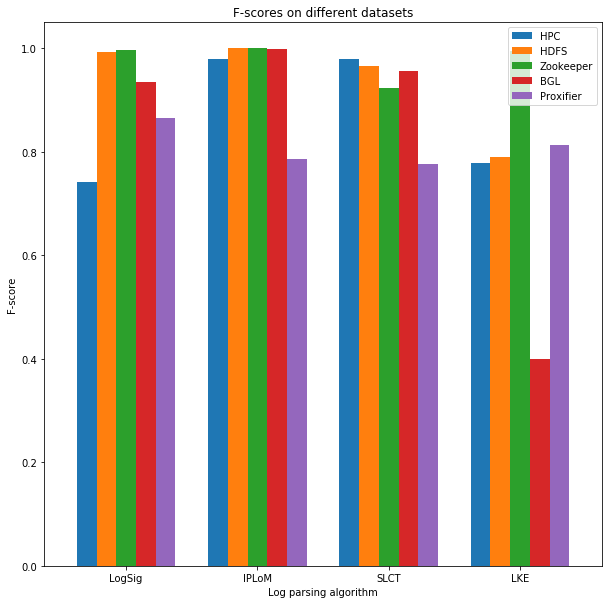

In [28]:
fig, ax = plt.subplots()
F1_measure["HPC"]=F1_measure.HPC.astype(float)
F1_measure["HDFS"]=F1_measure.HDFS.astype(float)
F1_measure["Zookeeper"]=F1_measure.Zookeeper.astype(float)
F1_measure["BGL"]=F1_measure.BGL.astype(float)
F1_measure["Proxifier"]=F1_measure.Proxifier.astype(float)
F1_measure.plot(x="Algorithm", y=["HPC", "HDFS", "Zookeeper", "BGL", "Proxifier"],kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('F-scores on different datasets')
ax.set_xlabel("Log parsing algorithm")
ax.set_ylabel("F-score")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Figures/F1_1", dpi=300)


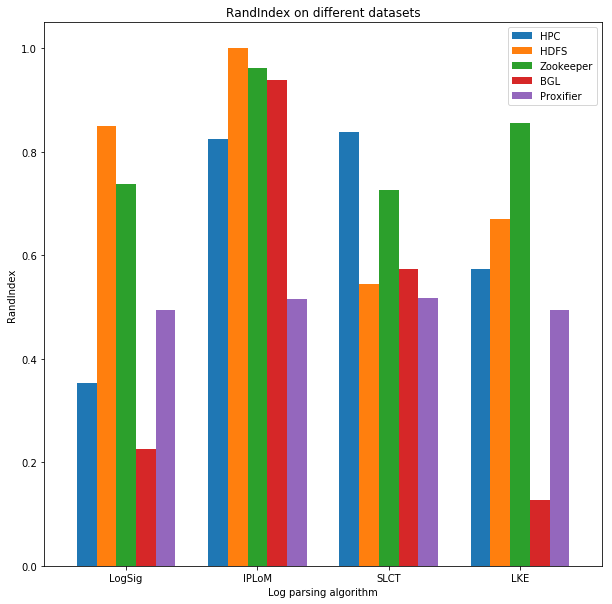

In [29]:
fig, ax = plt.subplots()
Accuracy["HPC"]=Accuracy.HPC.astype(float)
Accuracy["HDFS"]=Accuracy.HDFS.astype(float)
Accuracy["Zookeeper"]=Accuracy.Zookeeper.astype(float)
Accuracy["BGL"]=Accuracy.BGL.astype(float)
Accuracy["Proxifier"]=Accuracy.Proxifier.astype(float)
Accuracy.plot(x="Algorithm", y=["HPC", "HDFS", "Zookeeper", "BGL", "Proxifier"],kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('RandIndex on different datasets')
ax.set_xlabel("Log parsing algorithm")
ax.set_ylabel("RandIndex")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Figures/ACC_1", dpi=300)

In [17]:
import datetime as dt
import matplotlib
from matplotlib.ticker import FuncFormatter

fig, ax = plt.subplots()

def format_tex(float_number):
    if not (float_number): return 0
    exponent = np.floor(np.log10(float_number))
    mantissa = float_number/10**exponent
    mantissa_format = str(mantissa)[0:3]
    return "${0}*10^{{{1}}}$"\
           .format(mantissa_format, str(int(exponent)))


Runtime.plot(x="Algorithm", y=["HPC", "HDFS", "Zookeeper", "BGL", "Proxifier"],kind="bar", figsize= (10, 10), width=0.75, ax=ax)
ax.set_title('Runtime on different datasets')
ax.set_xlabel("Log parsing algorithm")
ax.set_ylabel("Runtime (Seconds)")
ax.grid(False)
plt.xticks(rotation = 360)
plt.show()

fig.savefig("Runtime_1", dpi=300)

TypeError: Empty 'DataFrame': no numeric data to plot

In [13]:
Runtime = df[df["Measure"].eq("Runtime")].reset_index()
Runtime["HPC"]= pd.to_timedelta(Runtime["HPC"]).dt.total_seconds()
Runtime["HDFS"]= pd.to_timedelta(Runtime["HDFS"]).dt.total_seconds()
Runtime["Zookeeper"]= pd.to_timedelta(Runtime["Zookeeper"]).dt.total_seconds()
Runtime["BGL"]= pd.to_timedelta(Runtime["BGL"]).dt.total_seconds()
Runtime["Proxifier"]= pd.to_timedelta(Runtime["Proxifier"]).dt.total_seconds()


In [14]:
Runtime

,index,Measure,HPC,HDFS,Zookeeper,BGL,Proxifier,Algorithm


In [ ]:
def format_tex(float_number):
    exponent = np.floor(np.log10(float_number))
    mantissa = float_number/10**exponent
    mantissa_format = str(mantissa)[0:3]
    return "${0}\times10^{{{1}}}$"\
           .format(mantissa_format, str(int(exponent)))

In [28]:
Runtime["HPC"]

0    139.186951
1     67.901379
2      0.585541
3      4.418395
Name: HPC, dtype: float64

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

fig, ax = plt.subplots()

x = Runtime["HPC"] 
y = Runtime["HPC"] 

ax.plot(x,y)

f = mticker.ScalarFormatter(useOffset=False, useMathText=True)
g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
plt.gca().yaxis.set_major_formatter(mticker.FuncFormatter(g))

plt.show()

NameError: name 'Runtime' is not defined

In [1]:
# LKE demo
import sys
sys.path.append('../')
import LKE, evaluator
import os
import pandas as pd

benchmark_settings = {
    'HDFS': {
        'log_file': 'HDFS/HDFS_2k.log',
        'log_format': '<Date> <Time> <Pid> <Level> <Component>: <Content>',
        'regex': [r'blk_-?\d+', r'(\d+\.){3}\d+(:\d+)?'],
        'split_threshold': 3
        },

    'Zookeeper': {
        'log_file': 'Zookeeper/Zookeeper_2k.log',
        'log_format': '<Date> <Time> - <Level>  \[<Node>:<Component>@<Id>\] - <Content>',
        'regex': [r'(/|)(\d+\.){3}\d+(:\d+)?'],
        'split_threshold': 20
        },

    'BGL': {
        'log_file': 'BGL/BGL_2k.log',
        'log_format': '<Label> <Timestamp> <Date> <Node> <Time> <NodeRepeat> <Type> <Component> <Level> <Content>',
        'regex': [r'core\.\d+'],
        'split_threshold': 30
        },

    'HPC': {
        'log_file': 'HPC/HPC_2k.log',
        'log_format': '<LogId> <Node> <Component> <State> <Time> <Flag> <Content>',
        'regex': [r'=\d+'],
        'split_threshold': 10
        },

    'Proxifier': {
        'log_file': 'Proxifier/Proxifier_2k.log',
        'log_format': '\[<Time>\] <Program> - <Content>',
        'regex': [r'<\d+\ssec', r'([\w-]+\.)+[\w-]+(:\d+)?', r'\d{2}:\d{2}(:\d{2})*', r'[KGTM]B'],
        'split_threshold': 3
        },

   
}

for i in range(1):
    input_dir = 'logs/' # The input directory of log file
    output_dir = 'LKE_result_run_4/'# The output directory of parsing results
    bechmark_result = []
    for dataset, setting in benchmark_settings.iteritems():
        print('\n=== Evaluation on %s ==='%dataset)
        indir = os.path.join(input_dir, os.path.dirname(setting['log_file']))
        log_file = os.path.basename(setting['log_file'])

        parser = LKE.LogParser(log_format=setting['log_format'], indir=indir, outdir=output_dir, rex=setting['regex'], 
                            split_threshold=setting['split_threshold'])
        parser.parse(log_file)
        
        F1_measure, accuracy = evaluator.evaluate(
                            groundtruth=os.path.join(indir, log_file + '_structured.csv'),
                            parsedresult=os.path.join(output_dir, log_file + '_structured.csv')
                            )
        bechmark_result.append([dataset, F1_measure, accuracy])

    print('\n=== Overall evaluation results ===')
    df_result = pd.DataFrame(bechmark_result, columns=['Dataset', 'F1_measure', 'Accuracy'])
    df_result.set_index('Dataset', inplace=True)
    print(df_result)
    df_result.T.to_csv('LKE_bechmark_result.csv')



=== Evaluation on HPC ===
Parsing file: logs/HPC/HPC_2k.log
=== Step 1: Erasing parameters ===
the parameter v is: 3
there are 2000 loglines
Loading distance matrix from cache..
kMeans calculation...
the threshold1 is: [2.61920292]
================get the initial groups splitting=============
there are 32 groups
splitting into different groups...
the split_threshold is 10
there is no common part in this group
there is no common part in this group
Merge the lists together...
there are 71 different groups
Parsing done. [Time taken: 0:01:08.577639]
Precision: 0.9896, Recall: 0.9965, F1_measure: 0.9930, Parsing_Accuracy: 0.8455

=== Evaluation on HDFS ===
Parsing file: logs/HDFS/HDFS_2k.log
=== Step 1: Erasing parameters ===
the parameter v is: 6
there are 2000 loglines
calculating distance....
calculate distance between every two logs...
kMeans calculation...
the threshold1 is: [4.50701938]
================get the initial groups splitting=============
there are 12 groups
splitting into d

In [3]:
import LogSig
benchmark_settings = {
    'HDFS': {
        'log_file': 'HDFS/HDFS_2k.log',
        'log_format': '<Date> <Time> <Pid> <Level> <Component>: <Content>',
        'regex': [r'blk_-?\d+', r'(\d+\.){3}\d+(:\d+)?'],
        'groupNum': 15
        },

    'Zookeeper': {
        'log_file': 'Zookeeper/Zookeeper_2k.log',
        'log_format': '<Date> <Time> - <Level>  \[<Node>:<Component>@<Id>\] - <Content>',
        'regex': [r'(/|)(\d+\.){3}\d+(:\d+)?'],
        'groupNum': 46
        },

    'BGL': {
        'log_file': 'BGL/BGL_2k.log',
        'log_format': '<Label> <Timestamp> <Date> <Node> <Time> <NodeRepeat> <Type> <Component> <Level> <Content>',
        'regex': [r'core\.\d+'],
        'groupNum': 500
        },

    'HPC': {
        'log_file': 'HPC/HPC_2k.log',
        'log_format': '<LogId> <Node> <Component> <State> <Time> <Flag> <Content>',
        'regex': [r'=\d+'],
        'groupNum': 800
        },

    'Proxifier': {
        'log_file': 'Proxifier/Proxifier_2k.log',
        'log_format': '\[<Time>\] <Program> - <Content>',
        'regex': [r'<\d+\ssec', r'([\w-]+\.)+[\w-]+(:\d+)?', r'\d{2}:\d{2}(:\d{2})*', r'[KGTM]B'],
        'groupNum': 10
        },

}

for i in range(1, 6):
    input_dir = 'logs/' # The input directory of log file
    output_dir = 'LogSig_result_run_%d/'%i # The output directory of parsing results
    bechmark_result = []
    for dataset, setting in benchmark_settings.iteritems():
        print('\n=== Evaluation on %s ==='%dataset)
        indir = os.path.join(input_dir, os.path.dirname(setting['log_file']))
        log_file = os.path.basename(setting['log_file'])

        parser = LogSig.LogParser(log_format=setting['log_format'], indir=indir, outdir=output_dir, rex=setting['regex'], groupNum=setting['groupNum'])
        parser.parse(log_file)
        
        F1_measure, accuracy = evaluator.evaluate(
                            groundtruth=os.path.join(indir, log_file + '_structured.csv'),
                            parsedresult=os.path.join(output_dir, log_file + '_structured.csv')
                            )
        bechmark_result.append([dataset, F1_measure, accuracy])

    print('\n=== Overall evaluation results ===')
    df_result = pd.DataFrame(bechmark_result, columns=['Dataset', 'F1_measure', 'Accuracy'])
    df_result.set_index('Dataset', inplace=True)
    print(df_result)
    df_result.T.to_csv('LogSig_bechmark_result.csv')



=== Evaluation on HPC ===
Parsing file: logs/HPC/HPC_2k.log
Loading logs...
Generating term pairs...
Log message partitioning...
Log message signature construction...
Parsing done. [Time taken: 0:01:10.254872]
Precision: 0.7579, Recall: 0.7247, F1_measure: 0.7409, Parsing_Accuracy: 0.3540

=== Evaluation on HDFS ===
Parsing file: logs/HDFS/HDFS_2k.log
Loading logs...
Generating term pairs...
Log message partitioning...
Log message signature construction...
Parsing done. [Time taken: 0:00:04.278949]
Precision: 1.0000, Recall: 0.9837, F1_measure: 0.9918, Parsing_Accuracy: 0.8495

=== Evaluation on Zookeeper ===
Parsing file: logs/Zookeeper/Zookeeper_2k.log
Loading logs...
Generating term pairs...
Log message partitioning...
Log message signature construction...
Parsing done. [Time taken: 0:00:11.147695]
Precision: 0.9971, Recall: 0.9960, F1_measure: 0.9966, Parsing_Accuracy: 0.7380

=== Evaluation on BGL ===
Parsing file: logs/BGL/BGL_2k.log
Loading logs...
Generating term pairs...
Log 